In [1]:
#!pip install tensorflow tensorflow-gpu opencv-python matplotlib

In [2]:
import tensorflow as tf
import os

In [3]:
#Void OOM error by setting gpu memory consumption growth
# gpus = tf.config.experientaL.list_physical_devices('GPU')
# for gpu in gpus:
#   tf.config.experimental.set_memory_growth(gpu,True)

In [4]:
import cv2
import imghdr
from matplotlib import pyplot as plt

In [5]:
data_dir = '/content/drive/My Drive/ImageClassification/data'

In [6]:
os.listdir(os.path.join(data_dir,'HappyPeople'))

['image21.jpeg',
 'image15.jpeg',
 'images.jpg',
 'images14.jpg',
 'images15.jpg',
 'images20.jpg',
 'images29.jpg',
 'young-and-happy-people-vector-15114154.jpg',
 '_happy_jumping_on_beach-40815.jpg',
 'business-happy-people-vector-21811131.jpg',
 'cartoon-happy-people-vector-217043.jpg',
 'f2d07d65-96d6-44a3-b823-8fe496038ee6.jpg',
 'happy-woman-in-nature-at-sunset.jpg',
 'images43.jpg',
 'Happy.jpg',
 'images44.jpg',
 'images48.jpg',
 'happiness_thumbnail.jpg',
 'business-people-succesful-celebrating-group-successful-39416686-800x500.jpg',
 'maxresdefault.jpg',
 '988689_Wallpaper2.jpg',
 'A_Sep20_14_1189155141.jpg',
 'what-makes-people-happy1.jpg',
 'Happy-Guy.jpg',
 '8cEbMbgxi.jpg',
 '20150708124649-simple-secret-happy-life-woman-enjoy-joy.jpeg',
 '8e06de1bf2171da2312b6de61c61e4bc.jpg',
 'happy-people-in-the-poppy-field-1280x800-wide-wallpapers-net.jpg',
 'getty_505175324_2000131020009280246_158016.jpg',
 'happy-indians_5f66fd46d9f5b.jpg',
 'o-HAPPY-facebook.jpg',
 'Employee_Happin

In [7]:
image_extensions = ['jpeg','jpg','bmp','png']

In [8]:
image_extensions

['jpeg', 'jpg', 'bmp', 'png']

In [9]:
# img = cv2.imread(os.path.join('/content/drive/My Drive/ImageClassification/data','HappyPeople','2016-01-04-1451880335-5503640-thedailyhabitsofsupremelyhappypeople.jpg'))


In [10]:
# type(img)

In [11]:
# img.shape

In [12]:
# plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
# plt.show()

In [13]:
for image_class in os.listdir(data_dir):
  for image in os.listdir(os.path.join(data_dir,image_class)):
    image_path = os.path.join(data_dir,image_class,image)
    try:
      img = cv2.imread(image_path)
      tip = imghdr.what(image_path)
      if tip not in image_extensions:
        print('Image not in extension list {}'.format(image_path))
        os.remove(image_path)
    except Exception as e:
      print('Issue with image {}',format(image_path))



In [14]:
tf.data.Dataset

tensorflow.python.data.ops.dataset_ops.DatasetV2

In [15]:
import numpy as np


In [16]:
# tf.keras.utils.image_dataset_from_directory??

In [17]:
# data = tf.keras.utils.image_dataset_from_directory('/content/drive/My Drive/ImageClassification/data',batch_size = 16,image_size = (256,256))

In [18]:
data = tf.keras.utils.image_dataset_from_directory('/content/drive/My Drive/ImageClassification/data')

Found 167 files belonging to 2 classes.


In [19]:
data

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [20]:
data_iterator = data.as_numpy_iterator()

In [21]:
batch = data_iterator.next()

In [22]:
batch[0].shape

(32, 256, 256, 3)

In [23]:
#happy people  = 0,sad people = 1
batch[1]

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1], dtype=int32)

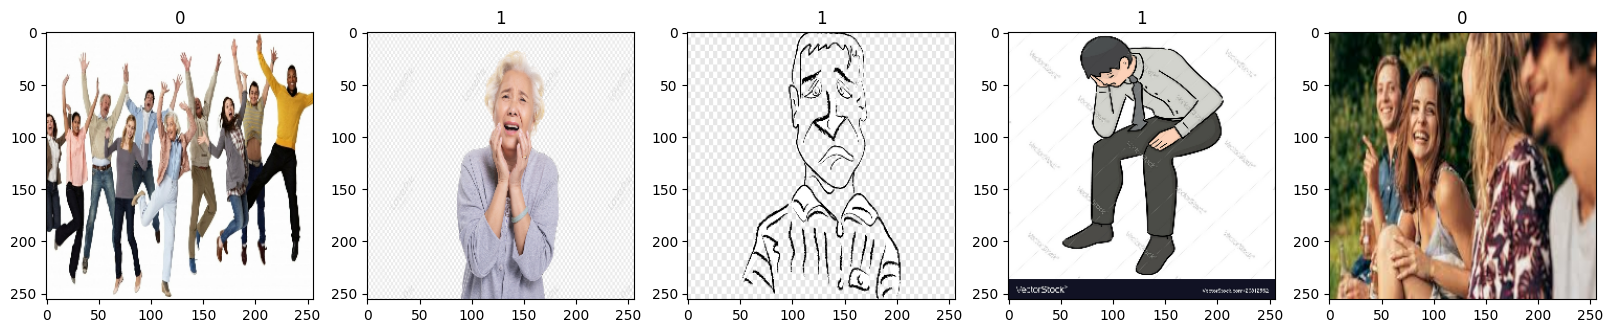

In [24]:
fig,ax = plt.subplots(ncols = 5,figsize = (20,20))
for idx,img in enumerate(batch[0][:5]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])

In [25]:
# batch[0].max()

In [26]:
scaled = batch[0]/255

In [27]:
scaled.min()

0.0

In [28]:
scaled.max()

1.0

PRE PROCESS THE DATA

2.1 Scale data


In [29]:
data = data.map(lambda x,y:(x/255,y))

In [30]:
data.as_numpy_iterator().next()[0].min()

0.0

In [31]:
data.as_numpy_iterator().next()[0].max()

1.0

In [32]:
len(data)

6

In [33]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size =int(len(data)*.1)+1

In [34]:
train_size

4

In [35]:
val_size

1

In [36]:
test_size

1

In [37]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [38]:
len(test)

1

DEEP LEARNING MODEL


3.1 build the deep learning model

In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout

In [40]:
model = Sequential()

In [41]:
model.add(Conv2D(16, (3,3), 1, activation = 'relu', input_shape = (256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation = 'relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3) ,1, activation = 'relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [42]:
model.compile('adam',loss = tf.losses.BinaryCrossentropy(), metrics= ['accuracy'])

In [43]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

In [44]:
logdir = '/content/drive/My Drive/ImageClassification/logs'

In [45]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = logdir)

In [46]:
hist = model.fit(train, epochs=20,validation_data= val, callbacks=[tensorboard_callback])

Epoch 1/20
4/4 [==============================] - 12s 1s/step - loss: 1.6496 - accuracy: 0.5156 - val_loss: 0.7802 - val_accuracy: 0.4688
Epoch 2/20
4/4 [==============================] - 5s 842ms/step - loss: 0.7248 - accuracy: 0.5547 - val_loss: 0.6328 - val_accuracy: 0.6250
Epoch 3/20
4/4 [==============================] - 8s 2s/step - loss: 0.6594 - accuracy: 0.6797 - val_loss: 0.6558 - val_accuracy: 0.5938
Epoch 4/20
4/4 [==============================] - 5s 831ms/step - loss: 0.6078 - accuracy: 0.6953 - val_loss: 0.6784 - val_accuracy: 0.5625
Epoch 5/20
4/4 [==============================] - 5s 859ms/step - loss: 0.6063 - accuracy: 0.6172 - val_loss: 0.4787 - val_accuracy: 0.7812
Epoch 6/20
4/4 [==============================] - 7s 941ms/step - loss: 0.4874 - accuracy: 0.8516 - val_loss: 0.4829 - val_accuracy: 0.8125
Epoch 7/20
4/4 [==============================] - 5s 939ms/step - loss: 0.4828 - accuracy: 0.7734 - val_loss: 0.6410 - val_accuracy: 0.6250
Epoch 8/20
4/4 [=========

In [47]:
hist.history

{'loss': [1.6495722532272339,
  0.7248362898826599,
  0.6593707203865051,
  0.6077532768249512,
  0.6062858700752258,
  0.48742803931236267,
  0.48276931047439575,
  0.47724127769470215,
  0.3639782667160034,
  0.32503271102905273,
  0.23050695657730103,
  0.22604216635227203,
  0.14504452049732208,
  0.12622082233428955,
  0.10173264145851135,
  0.07843334972858429,
  0.059949975460767746,
  0.062404483556747437,
  0.04911999776959419,
  0.031419623643159866],
 'accuracy': [0.515625,
  0.5546875,
  0.6796875,
  0.6953125,
  0.6171875,
  0.8515625,
  0.7734375,
  0.78125,
  0.859375,
  0.8671875,
  0.9296875,
  0.9140625,
  0.96875,
  0.9765625,
  0.984375,
  0.984375,
  0.9765625,
  0.9921875,
  0.9921875,
  1.0],
 'val_loss': [0.7802281379699707,
  0.6328078508377075,
  0.6557759642601013,
  0.678387463092804,
  0.47872430086135864,
  0.48293668031692505,
  0.6409759521484375,
  0.5083379149436951,
  0.2695638835430145,
  0.2677679657936096,
  0.20372894406318665,
  0.197710514068603

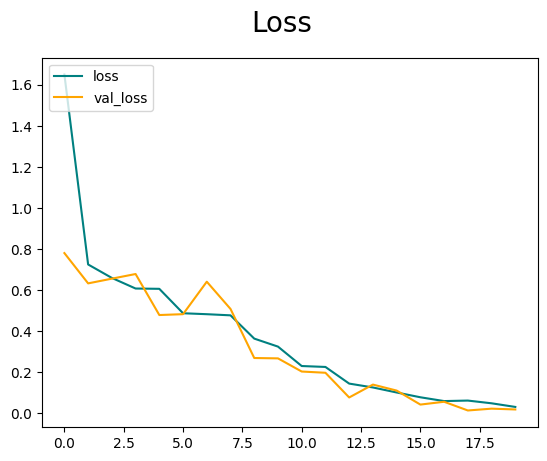

In [48]:
fig = plt.figure()
plt.plot(hist.history['loss'],color = 'teal' , label = 'loss')
plt.plot(hist.history['val_loss'],color = 'orange',label = 'val_loss')
fig.suptitle('Loss', fontsize = 20)
plt.legend(loc = "upper left")
plt.show()

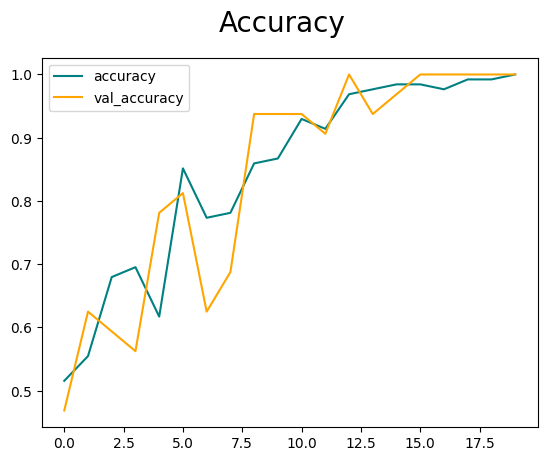

In [49]:
fig  =plt.figure()
plt.plot(hist.history['accuracy'],color = 'teal',label = 'accuracy')
plt.plot(hist.history['val_accuracy'], color = 'orange',label = 'val_accuracy')
fig.suptitle('Accuracy',fontsize = 20)
plt.legend(loc = "upper left")
plt.show()

EVALUATE PERFORMANCE


In [50]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [51]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()


In [52]:
for batcg in test.as_numpy_iterator():
  X,y = batch
  yhat = model.predict(X)
  pre.update_state(y,yhat)
  re.update_state(y,yhat)
  acc.update_state(y,yhat)

1/1 [==============================] - 0s 120ms/step


In [53]:
print(f'Precision:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()})')

Precision:1.0, Recall:0.7368420958518982, Accuracy:0.84375)


In [54]:
%cd '/content/drive/My Drive/ImageClassification/'

/content/drive/My Drive/ImageClassification


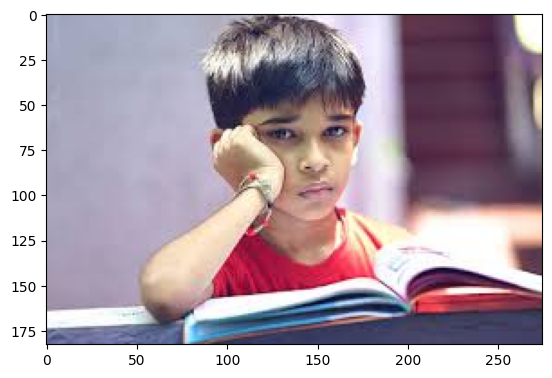

In [55]:
img = cv2.imread('sadtest.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

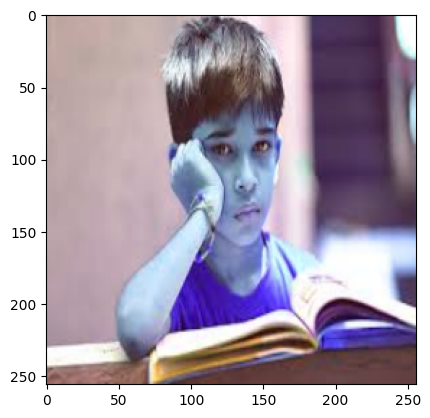

In [56]:
resize = tf.image.resize(img,(256, 256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [57]:
resize.shape

TensorShape([256, 256, 3])

In [58]:
np.expand_dims(resize,0).shape

(1, 256, 256, 3)

In [59]:
yhat = model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 317ms/step


In [60]:
yhat

array([[0.9792373]], dtype=float32)

In [61]:
if yhat>0.5:
  print(f'predicted class is sad')
else:
  print(f"predicted class is happy")

predicted class is sad
